In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from scipy.interpolate import interp1d
import scipy.stats as si  #for gaussian cdf
from scipy import optimize
import time, sys
from mpl_toolkits.mplot3d import Axes3D

 metodi “speciali” che sono identificati dalla presenza di due underscore prima e dopo del nome. Questi metodi non vengono chiamati direttamente facendo inst._metodo_, ma vengono in genere chiamati automaticamente in situazioni particolari.
 
il metodo init viene chiamato ogni volta in cui l'istanza viene creata. Init è il costruttore della classe, ogni argomento passato alla classe viene automaticamente passato al costruttore. In realtà però non è un vero e proprio costruttore perchè non crea l'istanza ma semplicemente la inizializza


Gli attributi di istanza sono generalmente più comuni e si dichiarano facendo istanza.attributo = valore. Quando un attributo di istanza viene dichiarato all’interno di un metodo (ad esempio l’__init__), si usa self.attributo = valore, dato che il self si riferisce all’istanza


È anche possibile aggiungere o rimuovere attributi dalle istanze, ma generalmente sconsigliato, dato che è preferibile avere gli stessi attributi (anche se con valori diversi) su tutte le istanze della stessa classe:
- verifichiamo gli attributi e metodi dell'istanzavusando dir() (i metodi speciali sono stati omessi) dir(oggetto di tipo classe)
- aggiungo attributo all'istanza rex.job
- rimuovere attributo del rex.job

Gli attributi di classe sono valori legati alla classe, che sono comuni e accessibili da tutte le istanze. Per dichiarare attributi di classe, esistono due modi: usando classe.attributo = valore o usando attributo = valore nel corpo della dichiarazione di una classe

Se ora volessi che una classe erediti da un'altra, basta aggiungere il nome della classe base (o delle classi, nel caso dell’ereditarietà multipla) tra parentesi dopo il nome della sottoclasse

L'istruzione __pass__ non ha effetti: è stata usata per il solo fatto che la definizione prevede un corpo che deve ancora essere scritto.

In [2]:
def error(AV,AV2,n,l):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return np.sqrt((AV2[n][l] - AV[n][l]**2)/n)


def Monte_Carlo_Analisys(data,N_block):
    N = N_block
    M= int(len(data))              # Total number of throws
    L=int(M/N)           # Number of throws in each block, please use for M a multiple of N
    K = int(len(data.T))
    ave = np.zeros((N,K))
    av2 = np.zeros((N,K))
    sum_prog = np.zeros((N,K))
    su2_prog = np.zeros((N,K))
    err_prog = np.zeros((N,K))
    x = np.arange(N)
    x*=L
    for l in range(K):
        for i in range(N):
            sum = 0
            for j in range(L):
                k = j+i*L
                sum += data[k][l]
            ave[i][l] = sum/L       # r_i 
            av2[i][l] = (ave[i][l])**2 # (r_i)^2 
    for l in range (K):
        for i in range(N):
            for j in range(i+1):
                sum_prog[i][l] += ave[j][l] # SUM_{j=0,i} r_j
                su2_prog[i][l] += av2[j][l] # SUM_{j=0,i} (r_j)^2
            sum_prog[i][l]/=(i+1) # Cumulative average
            su2_prog[i][l]/=(i+1) # Cumulative square average
            err_prog[i][l] = error(sum_prog,su2_prog,i,l) # Statistical uncertainty
        
    
    return x,sum_prog,err_prog
    

In [3]:
def Monte_Carlo_Result(data,N_block):
    N = N_block
    M= int(len(data))              # Total number of throws
    L=int(M/N)           # Number of throws in each block, please use for M a multiple of N
    K = int(len(data.T))
    ave = np.zeros((N,K))
    av2 = np.zeros((N,K))
    sum_prog = np.zeros((N,K))
    su2_prog = np.zeros((N,K))
    err_prog = np.zeros((N,K))
    for l in range(K):
        for i in range(N):
            sum = 0
            for j in range(L):
                k = j+i*L
                sum += data[k][l]
            ave[i][l] = sum/L       # r_i 
            av2[i][l] = (ave[i][l])**2 # (r_i)^2 
    for l in range (K):
        for i in range(N):
            for j in range(i+1):
                sum_prog[i][l] += ave[j][l] # SUM_{j=0,i} r_j
                su2_prog[i][l] += av2[j][l] # SUM_{j=0,i} (r_j)^2
            sum_prog[i][l]/=(i+1) # Cumulative average
            su2_prog[i][l]/=(i+1) # Cumulative square average
            err_prog[i][l] = error(sum_prog,su2_prog,i,l) # Statistical uncertainty
        
    mean = sum_prog[len(sum_prog)-1]
    err = err_prog[len(err_prog)-1]
    return mean,err  

In [4]:
def d1(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def Call_Closed(S, K, T, r, q, d_1, d_2):
    return S * np.exp(-q * T) * si.norm.cdf(d_1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d_2, 0.0, 1.0) 

def vega(S,T, q, d_1):
    return (1 / np.sqrt(2 * np.pi)) * S * np.exp(-q * T) * np.sqrt(T) * np.exp((-d_1 ** 2) * 0.5)

In [5]:
class Curve:
  
    def __init__(self, **kwargs):
      
        raise Exception('do not instantiate this class.')

    def __call__(self, date): #return the value of the curve at a defined time 
      
        return self.curve(date)


class EquityForwardCurve(Curve):
   
    def __init__(self, spot=None, reference=None, discounting_curve=None,
                repo_rates=None, repo_dates=None, dividend_rates=None, dividend_dates=None): #discounting_curve is a a DiscountingCurve type object
        self.spot = spot
        self.reference = reference
        self.discounting_curve = discounting_curve
        #self.repo_rates = interp1d(repo_dates, repo_rates)  #Linear interpolation inside the constructor since it is done only once
        #self.dividend_rates = interp1d(dividend_dates, dividend_rates)
        
    def curve(self, date):
        return (self.spot/self.discounting_curve(date))#*np.exp(-(self.dividend_rates(date)+self.repo_rates(date))*date)
        
    


class DiscountingCurve(Curve):

    def __init__(self, reference=None, discounts=None, dates=None):
       
        self.reference = reference
        self.discounts = interp1d(dates, discounts)
        

    def curve(self, date):  
        return np.exp(-self.discounts(date)*date)


class PricingModel:
   

    def __init__(self, **kwargs):
      
      raise Exception('model not implemented.')

    def simulate(self, fixings=None, Nsim=1, seed=14, **kwargs):
     
      raise Exception('simulate not implemented.')


class Black(PricingModel):
    """Black model"""
    
    def __init__(self, volatility=None, forward_curve=None, fixings=None, **kwargs):
        self.volatility = volatility
        self.forward_curve = forward_curve(fixings)  #K/F_0(T)
        self.fixings = fixings
       
    def setSeed(self, seed):
        rnd.seed(seed)
        
    def simulate(self, Nsim,**kwargs): #simulation of Martingale
        self.martingale = np.zeros((Nsim,len(self.fixings)))
        for i in range (Nsim):
            self.martingale[i] = np.exp(-0.5*(self.volatility**2)*self.fixings[:]+self.volatility*np.sqrt(self.fixings[:])*rnd.gauss(0,1))
    
    def Call_PayOff(self,strike): #Monte Carlo call
        self.h = strike/self.forward_curve
        self.pay = self.martingale- self.h
        for i in range (len(self.fixings)):
            for j in range (len(self.martingale)):
                self.pay[j][i] = max(self.pay[j][i],0)
        
    def Closed_Call(self,S_0=1):
        d_1 = (np.log((1./self.h)*S_0)+0.5*self.fixings*(self.volatility)**2)/(self.volatility*np.sqrt(self.fixings))
        d_2 = d_1 - self.volatility*np.sqrt(self.fixings)
        self.closed_call = S_0*si.norm.cdf(d_1, 0.0, 1.0) - (self.h)*si.norm.cdf(d_2, 0.0, 1.0)
        
    def newton_vol_call_div(self, S, C, i, r=0, q=0):
        """Implied volatility"""
        xold = 0 
        xnew = np.sqrt((2*np.pi)/self.fixings[i])*(C[i]/S[i]) 
        tolerance = 0.0001
    
        while abs(xnew - xold) > tolerance:
            xold = xnew
            d_1 = d1(S[i], self.h[i], self.fixings[i], r, q, xold)
            d_2 = d_1 - xold*np.sqrt(self.fixings[i])
            f = Call_Closed(S[i], self.h[i], self.fixings[i], r, q, d_1, d_2)
            v = vega(S[i], self.fixings[i], q, d_1)
            xnew = xold - (f-C[i])/ v

        return abs(xnew)

In [6]:
Nsim = int(1e6)
volatility = 0.25
spot = 100
npoints = 60
strike = np.linspace(0,150,npoints)
maturities = np.linspace(0.0001,2,npoints)

In [7]:
r_dates = np.linspace(0,7,10)
r = np.ones(10)*0.1
discounting_curve = DiscountingCurve(None,r,r_dates)
forward = EquityForwardCurve(spot,None,discounting_curve)

In [8]:
bs = Black(volatility,forward,maturities)
bs.simulate(Nsim)
X_T = np.mean(bs.martingale,axis=0)

In [16]:
bs.Call_PayOff(100)
x, mean, err = Monte_Carlo_Analisys(bs.pay,100)


In [17]:
bs.Closed_Call()

In [48]:
implied_volatility = np.zeros((npoints,npoints))
start_time = time.time()
for i in range(npoints):
    bs.Call_PayOff(strike[i])
    print(i,"Calculating strike: ",strike[i])
    mean, err = Monte_Carlo_Result(bs.pay,100)
    for j in range (npoints):
        implied_volatility[i][j] = bs.newton_vol_call_div(X_T, mean, j)


print("Tempo di esecuzione cella: ---%s minuti ---" %((time.time()-start_time)/60))

0 Calculating strike:  0.0


/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in double_scalars
/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in double_scalars


1 Calculating strike:  2.542372881355932


/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


2 Calculating strike:  5.084745762711864
3 Calculating strike:  7.627118644067796
4 Calculating strike:  10.169491525423728
5 Calculating strike:  12.711864406779661
6 Calculating strike:  15.254237288135592
7 Calculating strike:  17.796610169491526
8 Calculating strike:  20.338983050847457
9 Calculating strike:  22.881355932203387
10 Calculating strike:  25.423728813559322
11 Calculating strike:  27.966101694915253
12 Calculating strike:  30.508474576271183
13 Calculating strike:  33.050847457627114
14 Calculating strike:  35.59322033898305
15 Calculating strike:  38.13559322033898
16 Calculating strike:  40.67796610169491
17 Calculating strike:  43.220338983050844
18 Calculating strike:  45.762711864406775


/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in double_scalars


19 Calculating strike:  48.30508474576271
20 Calculating strike:  50.847457627118644
21 Calculating strike:  53.389830508474574
22 Calculating strike:  55.932203389830505
23 Calculating strike:  58.474576271186436
24 Calculating strike:  61.01694915254237
25 Calculating strike:  63.559322033898304
26 Calculating strike:  66.10169491525423
27 Calculating strike:  68.64406779661017
28 Calculating strike:  71.1864406779661
29 Calculating strike:  73.72881355932203
30 Calculating strike:  76.27118644067797
31 Calculating strike:  78.8135593220339
32 Calculating strike:  81.35593220338983
33 Calculating strike:  83.89830508474576
34 Calculating strike:  86.44067796610169
35 Calculating strike:  88.98305084745762
36 Calculating strike:  91.52542372881355
37 Calculating strike:  94.06779661016948
38 Calculating strike:  96.61016949152543
39 Calculating strike:  99.15254237288136
40 Calculating strike:  101.69491525423729
41 Calculating strike:  104.23728813559322
42 Calculating strike:  106.7

In [49]:
np.savetxt("implied_volatility_"+str(npoints)+".txt",implied_volatility)



In [50]:
K, T = np.meshgrid(strike,maturities)

In [57]:
np.savetxt("K_matrix_for"+str(npoints),K)
np.savetxt("T_matrix_for"+str(npoints),T)


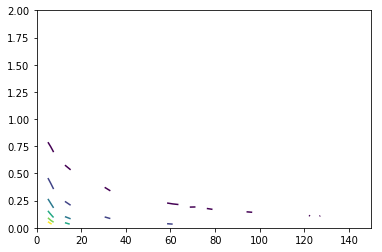

In [51]:
plt.contour(K,T,implied_volatility)

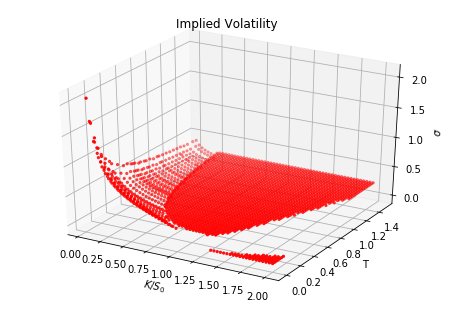

In [83]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(T,K/spot, implied_volatility, c="red",marker='.')
ax.set_xlabel('$K/S_0$')
ax.set_ylabel('T')
ax.set_zlabel('$\sigma$')
plt.title('Implied Volatility')
plt.show()

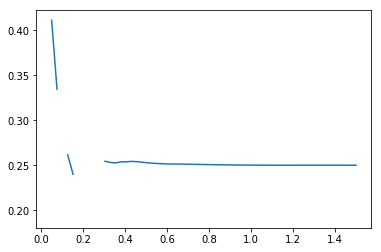

In [91]:
plt.plot(strike/spot,implied_volatility[:][19])

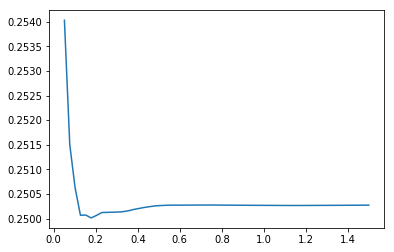

In [97]:
plt.plot(strike/spot,implied_volatility[30][:])

In [377]:
implied_volatility = np.zeros(len(maturities))
implied_volatility_error = np.zeros(len(maturities))
for i in range (len(maturities)):
    implied_volatility[i] = bs.newton_vol_call_div(X_T, mean, i)
    #implied_volatility_error = bs.newton_vol_call_div(X_T, err, i)
    

/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in double_scalars
/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


<ErrorbarContainer object of 3 artists>

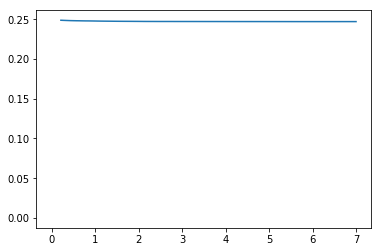

In [378]:
plt.errorbar(maturities,implied_volatility,yerr=0,label = 'Monte Carlo')

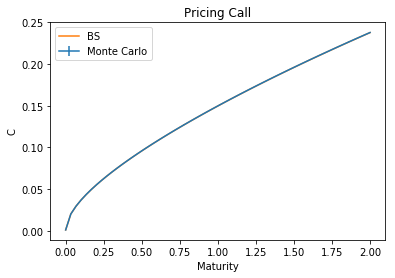

In [15]:

plt.errorbar(maturities,mean,yerr=err,label = 'Monte Carlo')
plt.plot(maturities,bs.closed_call,label='BS')
plt.title('Pricing Call')
plt.xlabel('Maturity')
plt.ylabel('C')
#plt.xlim(0.06,0.15)
#plt.ylim(0.02,0.04)
plt.savefig('Pricing_Call.pdf')
plt.legend()
plt.show()

In [71]:
maturities

array([1.00000000e-04, 1.02138776e-01, 2.04177551e-01, 3.06216327e-01,
       4.08255102e-01, 5.10293878e-01, 6.12332653e-01, 7.14371429e-01,
       8.16410204e-01, 9.18448980e-01, 1.02048776e+00, 1.12252653e+00,
       1.22456531e+00, 1.32660408e+00, 1.42864286e+00, 1.53068163e+00,
       1.63272041e+00, 1.73475918e+00, 1.83679796e+00, 1.93883673e+00,
       2.04087551e+00, 2.14291429e+00, 2.24495306e+00, 2.34699184e+00,
       2.44903061e+00, 2.55106939e+00, 2.65310816e+00, 2.75514694e+00,
       2.85718571e+00, 2.95922449e+00, 3.06126327e+00, 3.16330204e+00,
       3.26534082e+00, 3.36737959e+00, 3.46941837e+00, 3.57145714e+00,
       3.67349592e+00, 3.77553469e+00, 3.87757347e+00, 3.97961224e+00,
       4.08165102e+00, 4.18368980e+00, 4.28572857e+00, 4.38776735e+00,
       4.48980612e+00, 4.59184490e+00, 4.69388367e+00, 4.79592245e+00,
       4.89796122e+00, 5.00000000e+00])

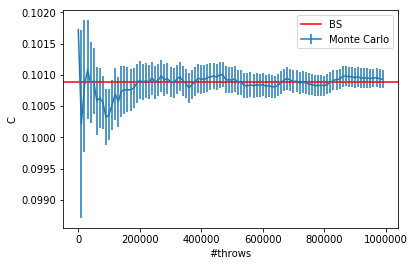

In [47]:
n = 16
plt.errorbar(x,mean.T[n],yerr=err.T[n],label = 'Monte Carlo')
plt.axhline(y=bs.closed_call[n], color = 'red',linestyle='-',label = 'BS')
plt.xlabel("#throws")
plt.ylabel('C')
plt.legend()
plt.savefig('Data Blocking.pdf')

In [43]:
y = 1/np.sqrt(x)

/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [44]:
x

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
       240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000,
       320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000,
       400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000,
       480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000,
       560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000,
       640000, 650000, 660000, 670000, 680000, 690000, 700000, 710000,
       720000, 730000, 740000, 750000, 760000, 770000, 780000, 790000,
       800000, 810000, 820000, 830000, 840000, 850000, 860000, 870000,
       880000, 890000, 900000, 910000, 920000, 930000, 940000, 950000,
       960000, 970000, 980000, 990000])

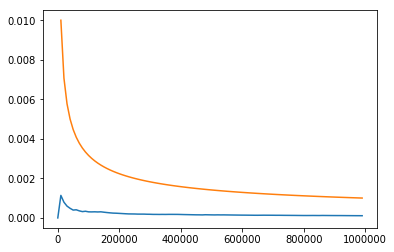

In [45]:
plt.plot(x,err.T[n],label="Monte Carlo")
plt.plot(x,y,label = '$1/\sqrt{N}$')

In [46]:
np.savetxt("error_"+str(maturities[n]),err.T[n])

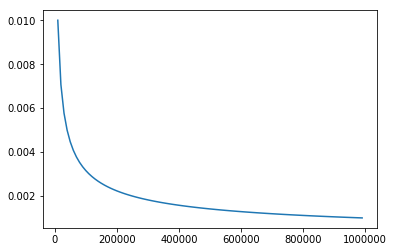

In [38]:
plt.plot(x,y)


## Implied Volatility

In [763]:
n = 4
m = 2
#pay = np.zeros((n,m))
martinga = np.array(([1,2.3],[3,4],[5,6],[7,8]))
forward = np.array([1,2,3,4])
#for i in range (n):
   # for j in range (m):
pay = (martinga.T-forward).T#max(self.martingale[:][i]-(strike/self.forward_curve[i]),0)
pay

array([[0. , 1.3],
       [1. , 2. ],
       [2. , 3. ],
       [3. , 4. ]])

In [756]:
n = 4
m = 2
pay = np.zeros((n,m))
martinga = np.array(([1,2.3],[3,4],[5,6],[7,8]))
forward = np.array([1,2,3,4])
for i in range (n):
    for j in range (m):
        pay[i][j] = martinga[i][j]-forward[i]#max(self.martingale[:][i]-(strike/self.forward_curve[i]),0)


In [757]:
pay

array([[0. , 1.3],
       [1. , 2. ],
       [2. , 3. ],
       [3. , 4. ]])

In [225]:
def d1(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def Call_Closed(S, K, T, r, q,d_1,d_2):
    return S * np.exp(-q * T) * si.norm.cdf(d_1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d_2, 0.0, 1.0) 

def vega(S,T, q, d_1):
    return (1 / np.sqrt(2 * np.pi)) * S * np.exp(-q * T) * np.sqrt(T) * np.exp((-d_1 ** 2) * 0.5)


In [245]:
def newton_vol_call_div(S, K, T, C, r, q):
    #C = call result of Monte Carlo
    #S = E[X_T]
    vol_old = 0 
    vol_new = np.sqrt((2*np.pi)/T)*(C/S) # Brenner and Subrahmanyam (1988) a closed form estimate as starting point
    tolerance = 0.0001
    i = 0
    #for i in range (len(C)):
    while (abs(vol_new - vol_old)).T > tolerance:
        vol_old = vol_new
        d_1 = d1(S, K, T, r, q, vol_old)
        d_2 = d_1 - vol_old*np.sqrt(T)
        f = Call_Closed(S, K, T, r, q, d_1, d_2)
        v = vega(S, T, q, d_1)
        vol_new = vol_old -  (f-C)/ v
        i = i+1
        print(vol_new)
    return abs(vol_new) 

In [203]:
newton_vol_call_div(100, 100, 1., 14, 0.05, 0.)


0.2939048807918462

In [260]:
time = np.array([1/365,10/365])
Call = np.array([1.4,3.4])
l = [66.72,50.5]

In [205]:
sigma = np.zeros(len(time))
for i in range (len(time)):
    sigma[i] = newton_vol_call_div(100,100,time[i],Call[i],0.05,0.)

In [265]:
def newton_vol_call_div(S, K, T, C, r, q):
    #C = call result of Monte Carlo
    #S = E[X_T]
    vol_old = 0 
    vol_new = np.sqrt((2*np.pi)/T)*(C/S) # Brenner and Subrahmanyam (1988) a closed form estimate as starting point
    tolerance = 0.0001
    i = 0
    #for i in range (len(C)):
    while abs(vol_new - vol_old) > tolerance:
        vol_old = vol_new
        d_1 = d1(S, K, T, r, q, vol_old)
        d_2 = d_1 - vol_old*np.sqrt(T)
        f = Call_Closed(S, K, T, r, q, d_1, d_2)
        v = vega(S, T, q, d_1)
        vol_new = vol_old -  (f-C)/ v
        i = i+1
        #print(vol_new)
    return abs(vol_new) 

In [266]:
sigma = newton_vol_call_div(100,100,time,Call,0.05,0.)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()